<a href="https://colab.research.google.com/github/greenixproject/machine-learning/blob/main/Vehicle_Greenix/Model/vehicle_emission_motorcycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMISI CARBON (CO2) FOOTPRINT VEHICLE MOTORCYCLE
1. Emisi karbon banyak terutama dari aktivitas sehari-hari salah satunya adalah dari penggunaan kendaraan bermotor salah satunya yaitu motor. 
2. Awareness masyarakat masih kurang tentang karbon yang dapat dihasilkan
3. Dari permasalahan tersebut, pada project kali ini kami akan membuat prediksi emisi karbon yang dihasilkan dari kendaraan bermotor
4. Data yang kami gunakan diambil dan dikumpulkan dari survei kepada responden, jurnal dan website lainnya


In [ ]:
!pip install tensorflow==2.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.0
    Uninstalling tensorboard-data-server-0.7.0:
      Successfully uninstalled tensorboard-data-server-0.7.0
  Attempting uninstall: google-auth-oauthlib
    Fo

In [ ]:
# Import library
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import save_model

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load Data

In [ ]:
# Menentukan path file CSV yang telah diunggah
file_path = '/content/drive/MyDrive/Vehicle_Greenix/Dataset/vehicle_motor.csv'

# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama DataFrame
print(df.head())

   no       nama                        email motor_class motor_subclass  \
0   1   Johan **        *******i706@gmail.com      110_CC        Injeksi   
1   2    David *       *********@***pcr.ac.id      110_CC        Injeksi   
2   3  Nyimas **       *******firaa@gmail.com      110_CC        Injeksi   
3   4  Marani **      *******amelin@gmail.com      110_CC        Injeksi   
4   5  Zahra ***  *******etaputri10@gmail.com      110_CC        Injeksi   

  fuel_type  fuel_consumption(L/100Km)  emission_factor  distanced  emissions  
0    Petrol                       1.85           0.0342         43     1.5350  
1    Petrol                       1.85           0.0342         64     2.2537  
2    Petrol                       1.85           0.0342          9     0.3713  
3    Petrol                       1.85           0.0342         38     1.3639  
4    Petrol                       1.85           0.0342         74     2.5960  


Keterangan kolom:
- nomer: Nomor urut responden
- nama: Nama responden
- email: Email responden
- motor_class : Pembagian Jenis-jenis motor berdasarkan cc motor dimana dibagi 4 jenis yaitu 110_cc, 125_cc, 1150_cc, 250_cc
- motor_subclass : Pembagian Jenis pembakaran bahan bakar pada mesin yang terbagi menjadi 2 jenis yaitu injeksi dan karburator
- fuel_type : Pembagian Jenis bahan bakar yang biasanya digunakan pada motor di Indonesia yaitu Petrol (Premium, Pertalite, Pertamax, dan Sejenisnya).
- fuel_consumption: Konsumsi bahan bakar setiap jenis motor dengan skala 1L / 100KM
- emmisions_factor: Faktor emisi berdasarkan jenis bahan bakarnya
- distanced: Jarak yang ditempuh oleh kendaraan dalam sekali perjalanan dengan satuan kilometer
- emissions: Nilai emisi yang dihasilkan tiap kendaraan dengan formula 
emisi = ((jarak + konsumsi bahan bakar) * faktor emisi)

## DATA CLEANING

In [ ]:
# cek data duplikat
df.duplicated().sum()

0

In [ ]:
# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

In [ ]:
df = df.drop(['no',	'nama',	'email', 'fuel_type'], axis=1)

## Data Preprocessing

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['fuel_consumption(L/100Km)',	'emission_factor',	'distanced',	'emissions']

In [ ]:
# Mendeteksi outliers dengan Z-score
z_scores = stats.zscore(df[numeric_columns])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  
# Menghilangkan data dengan Z-score lebih dari 3
data = df[filtered_entries]

## Eksplorasi Data

In [ ]:
df.head()

,motor_class,motor_subclass,fuel_consumption(L/100Km),emission_factor,distanced,emissions
0,110_CC,Injeksi,1.85,0.0342,43,1.5350
1,110_CC,Injeksi,1.85,0.0342,64,2.2537
2,110_CC,Injeksi,1.85,0.0342,9,0.3713
3,110_CC,Injeksi,1.85,0.0342,38,1.3639
4,110_CC,Injeksi,1.85,0.0342,74,2.5960


In [ ]:
# Melihat jumlah baris dan kolom
df.shape

(651, 6)

In [ ]:
# Melihat info statistik data
df.describe()

,fuel_consumption(L/100Km),emission_factor,distanced,emissions
count,651.000000,651.000000,651.000000,651.000000
mean,2.935637,0.090645,51.299539,4.949751
std,0.669918,0.040326,28.981442,3.728508
min,1.850000,0.034200,1.000000,0.097500
25%,2.400000,0.057600,24.000000,2.176850
50%,2.800000,0.078400,52.000000,3.882200
75%,3.450000,0.119000,76.000000,7.027250
max,4.150000,0.172200,100.000000,17.420600


In [ ]:
# Melihat tipe data
print(df.dtypes)

motor_class                   object
motor_subclass                object
fuel_consumption(L/100Km)    float64
emission_factor              float64
distanced                      int64
emissions                    float64
dtype: object


In [ ]:
# melihat missing values
df[df==0].count()

motor_class                  0
motor_subclass               0
fuel_consumption(L/100Km)    0
emission_factor              0
distanced                    0
emissions                    0
dtype: int64

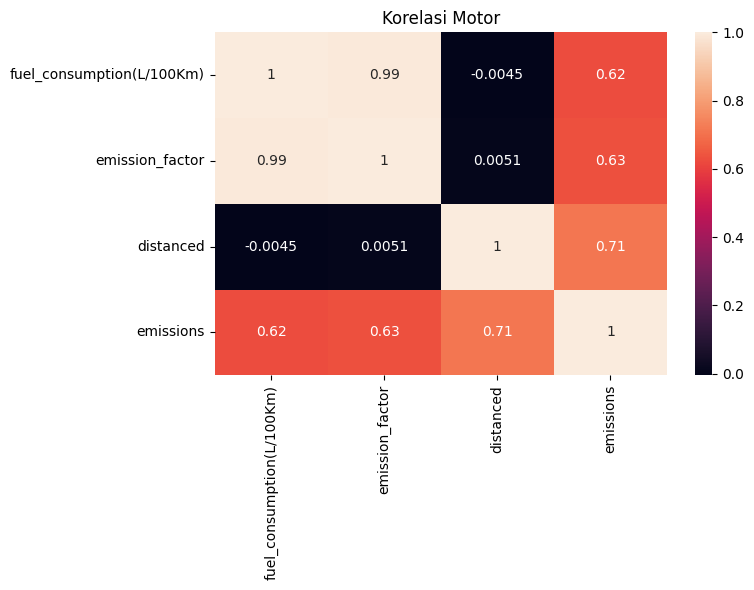

In [ ]:
motor_emissions_columns = {
    'Motor': ['fuel_consumption(L/100Km)',	'emission_factor',	'distanced',	'emissions'],
}

# Membuat subplots untuk masing-masing motor
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# Meloopi setiap motor
for motor, columns in motor_emissions_columns.items():
    # Subset kolom untuk motor tertentu
    subset = df[columns].corr()
    
    # Heatmap untuk motor tertentu
    sns.heatmap(subset, annot=True, ax=axes)
    axes.set_title(f'Korelasi {car.capitalize()}')

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Mengambil kolom numerik untuk perhitungan Z-score
numeric_columns = ['fuel_consumption(L/100Km)',	'emission_factor',	'distanced',	'emissions']

### Feature Selection
Akan dilakukan pemisahan fitur dan target untuk setiap kendaraan. 
Yang menjadi fitur adalah 'distanced', 'fuel_comsumption(L/100 Km)', dan 'emissions_factor', sedangkan untuk target kami adalah 'emissions'.

In [ ]:
# Memisahkan fitur dan target untuk motor
motor_features = df[['fuel_consumption(L/100Km)',	'emission_factor',	'distanced']]
motor_target = df['emissions']

# Normalize the features

In [ ]:
# Menormalkan Fitur 
scaler = StandardScaler()
motor_features_normalized = scaler.fit_transform(motor_features)

### Splitting Data
Data yang digunakan untuk training sebanyak 80% dan testing sebanyak 20%

In [ ]:
# Membagi data motor menjadi set pelatihan dan pengujian
motor_X_train, motor_X_test, motor_y_train, motor_y_test = train_test_split(motor_features, motor_target, test_size=0.2, random_state=42)

### Modelling 
Melatih model dengan regresi linier untuk setiap motor

In [ ]:
# Melatih model regresi linier untuk motor
motor_model = LinearRegression()
motor_model.fit(motor_X_train, motor_y_train)

# Melakukan prediksi emisi karbon dari konsumsi motor
motor_y_pred = motor_model.predict(motor_X_test)

# Menghitung evaluasi performa model untuk motor
motor_mse = mean_squared_error(motor_y_test, motor_y_pred)
motor_r2 = r2_score(motor_y_test, motor_y_pred)

Untuk evaluasi performa model ini menggunakan MSE dibanding MAE karen beberapa pertimbangan-pertimbangan berikut:
1. Dalam perhitungan MSE, bobot yang diberikan pada kesalahan yang besar lebih tinggi karena selisih antara nilai prediksi dan nilai sebenarnya di kuadratkan. Hal ini memungkinkan pengidentifikasian dan penekanan pada outlier atau kesalahan prediksi yang signifikan dalam model. Saya mengutamakan identifikasi kesalahan prediksi yang penting dan membutuhkan perhatian lebih.
2. Selain itu saya juga ingin mengukur kesalahan prediksi dalam skala yang sama dengan variabel target, yaitu emisi karbon. MSE memberikan hasil dalam satuan kuadrat (misalnya, kg CO2e^2), yang konsisten dengan skala variabel target. Sehingga saya ingin memastikan bahwa ukuran kesalahan yang saya gunakan sesuai dengan skala yang relevan.
3. MSE memberikan penekanan lebih pada kesalahan yang lebih besar karena mengkuadratkan selisih antara prediksi dan nilai sebenarnya. Sebagai seorang data scientist, saya ingin memastikan bahwa kesalahan prediksi yang signifikan memiliki dampak yang lebih besar pada penilaian performa model.

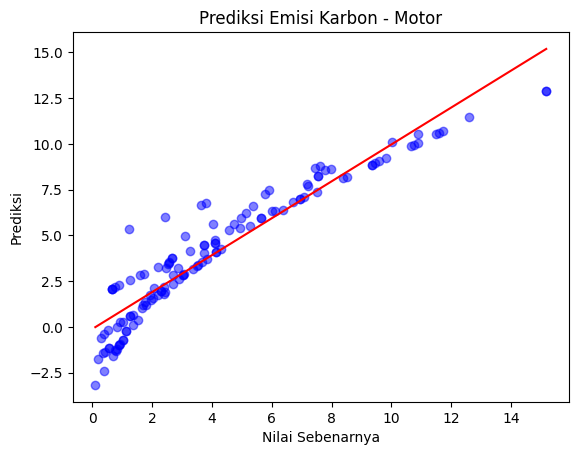

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Visualisasi dan garis regresi untuk motor
plt.scatter(motor_y_test, motor_y_pred, color='blue', alpha=0.5)
plt.plot(np.unique(motor_y_test), np.poly1d(np.polyfit(motor_y_test, motor_y_pred, 1))(np.unique(motor_y_test)), color='red')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Prediksi')
plt.title('Prediksi Emisi Karbon - Motor')
plt.show()


In [ ]:
# Menampilkan hasil evaluasi performa model
print("Hasil evaluasi performa model untuk car:")
print("MSE:", motor_mse)
print("R-squared:", motor_r2)

Hasil evaluasi performa model untuk car:
MSE: 1.496211163218264
R-squared: 0.8736877684934633


# Interpretasi

**Evaluasi performa model untuk mobil:**
- MSE (Mean Squared Error): 1.496211163218264
- R-squared: 0.8736877684934633
- Evaluasi performa model untuk motor menunjukkan hasil yang baik. Nilai MSE yang rendah dan nilai R-squared yang cukup tinggi menunjukkan bahwa model regresi linear untuk motor memiliki tingkat kesalahan yang relatif kecil dan mampu menjelaskan sekitar 87.36% variasi dalam emisi karbon motor.

# Membuat model Deep Learning. 
- model neural network dengan 3 layer untuk memprediksi emisi karbon dari konsumsi masing-masing kendaraan.
- menggunakan fungsi aktivasi relu pada layer pertama dan kedua, dan tidak menggunakan fungsi aktivasi pada layer output karena masalah regresi.
- Data diskalakan agar model dapat lebih efisien (menggunakan StandardScaler dari scikit-learn )

In [ ]:
# Standarisasi fitur dengan StandardScaler
scaler = StandardScaler()
motor_X_train_scaled = scaler.fit_transform(motor_X_train)
motor_X_test_scaled = scaler.transform(motor_X_test)

# Create the model
motor_model_tf = Sequential()
motor_model_tf.add(Dense(128, input_dim=motor_X_train_scaled.shape[1], activation='relu'))
motor_model_tf.add(Dense(64, activation='relu'))
motor_model_tf.add(Dense(1))

# Compile the model
motor_model_tf.compile(loss='mean_squared_error', optimizer='adam')


motor_model_tf.fit(motor_X_train_scaled, motor_y_train, epochs=20, batch_size=64, validation_split=0.2)

# Reshape the input data to have shape (None, 3)
motor_X_test_scaled_reshaped = motor_X_test_scaled.reshape(-1, 3)

# Predict the output for new data
motor_y_pred_tf = motor_model_tf.predict(motor_X_test_scaled_reshaped)

# Evaluate the model
motor_mse_tf = mean_squared_error(motor_y_test, motor_y_pred_tf)
motor_rmse_tf = np.sqrt(motor_mse_tf)
motor_r2_tf = r2_score(motor_y_test, motor_y_pred_tf)

print("Hasil evaluasi performa model TensorFlow untuk Motor:")
print("MSE:", motor_mse_tf)
print("RMSE:", motor_rmse_tf)
print("R-squared:", motor_r2_tf)

Epoch 1/20
7/7 [==============================] - 1s 37ms/step - loss: 39.7279 - val_loss: 29.5781
Epoch 2/20
7/7 [==============================] - 0s 13ms/step - loss: 35.1668 - val_loss: 25.7701
Epoch 3/20
7/7 [==============================] - 0s 22ms/step - loss: 30.6768 - val_loss: 21.7879
Epoch 4/20
7/7 [==============================] - 0s 21ms/step - loss: 25.7842 - val_loss: 17.7743
Epoch 5/20
7/7 [==============================] - 0s 20ms/step - loss: 20.7035 - val_loss: 13.8515
Epoch 6/20
7/7 [==============================] - 0s 20ms/step - loss: 15.6042 - val_loss: 10.1259
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 10.7703 - val_loss: 6.8193
Epoch 8/20
7/7 [==============================] - 0s 11ms/step - loss: 7.0521 - val_loss: 4.3689
Epoch 9/20
7/7 [==============================] - 0s 10ms/step - loss: 4.5435 - val_loss: 3.0633
Epoch 10/20
7/7 [==============================] - 0s 12ms/step - loss: 3.5029 - val_loss: 2.3983
Epoch 11/20
7/7 

**SAVE MODEL**
### kita akan save model dalam bentuk h5 dan sebagai alternatif akan dikonversi kedalam bentuk tflite.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
motor_model_tf.save('/content/gdrive/MyDrive/Vehicle_Greenix/Model/motor_model.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model.
model = load_model('/content/gdrive/MyDrive/Vehicle_Greenix/Model/motor_model.h5')

# Convert the model to TFLite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model.
with open('car_model.tflite', 'wb') as f:
    f.write(tflite_model)

motor_model_tf.save('/content/gdrive/MyDrive/Vehicle_Greenix/Model/motor_model.tflite')

In [ ]:
from tensorflow.keras.models import load_model

# Load model
motor_model = load_model('/content/gdrive/MyDrive/Vehicle_Greenix/Model/motor_model.h5')

Make Prediction New Data With Our Model


In [ ]:
import tensorflow as tf
import numpy as np

# Load the model
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Vehicle_Greenix/Model/motor_model.h5')

# Define the new data
distance = 10
fuel_consumption = 1
placeholder_value = 0

# Scale the new data
new_data = np.array([[distance, fuel_consumption, placeholder_value]])

# Make a prediction
prediction = model.predict(new_data)

# Print the prediction
print("Prediksi Emisi Motor adalah:", prediction[0])

Prediksi Emisi Motor adalah: [30.644266]
